### compare the pangenome structure of S. cerevisiae pan-genome from na1011,lg1392 and this study
- comparison content:
    1. gene existence frequency distribution
    2. pan-genome size
    3. core , accessory ,unique genome ratio of whole pan-genome
    

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"D:\code\github\Unified_Yeast_GEMs_Database\code")

In [2]:
# load geneMatrix
lg_geneMatrix=pd.read_csv(r"data\geneMatrix\lgpan_geneMatrix.csv",index_col=0)
na_geneMatrix=pd.read_csv(r"data\geneMatrix\nature1011_geneMatrix.csv",index_col=0)
this_geneMatrix=pd.read_csv(r"data\geneMatrix\pan1800_v2_blastp_50_70_geneMatrix.csv",index_col=0)
this_geneMatrix.sum(axis=0).describe()

count    1807.000000
mean     5982.582180
std        68.776684
min      5608.000000
25%      5957.000000
50%      5993.000000
75%      6022.000000
max      6276.000000
dtype: float64

In [3]:
# check the difference of core genes number with the changing of definition of core genes
lg_genes_ratios=lg_geneMatrix.sum(axis=1)/lg_geneMatrix.shape[1]
na_genes_ratios=na_geneMatrix.sum(axis=1)/na_geneMatrix.shape[1]
this_genes_ratios=this_geneMatrix.sum(axis=1)/this_geneMatrix.shape[1]

#### 1. check the gene existence frequency distribution in 3 sce pan-genome

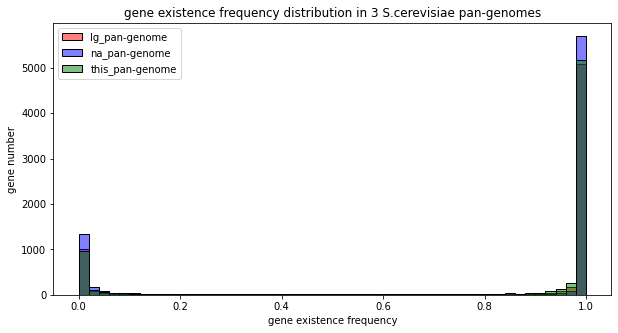

In [4]:
# plot the distribution of gene existence frequency in all strains
fig,ax=plt.subplots(1,1,figsize=(10,5))
# set different color for different species
sns.histplot(lg_genes_ratios,ax=ax,label="lg_pan-genome",alpha=0.5,bins=50,color="red") 
sns.histplot(na_genes_ratios,ax=ax,label="na_pan-genome",alpha=0.5,bins=50,color="blue")
sns.histplot(this_genes_ratios,ax=ax,label="this_pan-genome",alpha=0.5,bins=50,color="green")
ax.set_xlabel("gene existence frequency")
ax.set_ylabel("gene number")
ax.legend()
# plt.tight_layout()
plt.title("gene existence frequency distribution in 3 S.cerevisiae pan-genomes")
plt.show()

- result: 3 pan-genome have similar pattern of gene existence frequency distribution

#### 2. compare pan-genome size

In [5]:
def check_pangenome_structure(geneMatrix):
    genes_ratio=geneMatrix.sum(axis=1)/geneMatrix.shape[1]
    genes_ratio=genes_ratio.sort_values(ascending=False)
    pan=len(genes_ratio)
    core_100=len(genes_ratio[genes_ratio==1])
    core_99=len(genes_ratio[genes_ratio>=0.99])
    core_95=len(genes_ratio[genes_ratio>=0.95])
    unique5=len(genes_ratio[genes_ratio<=0.05])
    unique1=len(genes_ratio[genes_ratio<=0.01])
    accessory_5_95=pan-core_95-unique5
    accessory_5_99=pan-core_99-unique5
    lost=len(genes_ratio[genes_ratio==0])
    df=pd.Series({"pangenome":pan,
                  "100%core":core_100,
                  "99%core99":core_99,
                  "95%core":core_95,
                  "5-95% accessory":accessory_5_95,
                  "5-99% accessory":accessory_5_99,
                  "5% unique":unique5,
                  "1% unique":unique1,
                  "0% lost":lost})
    return df

lg_pangenome_structure=check_pangenome_structure(lg_geneMatrix)
na_pangenome_structure=check_pangenome_structure(na_geneMatrix)
this_pangenome_structure=check_pangenome_structure(this_geneMatrix)

# build the dataframe for pangenome structure comparison
pangenome_structure=pd.DataFrame({"lg_pangenome":lg_pangenome_structure,
                                    "na_pangenome":na_pangenome_structure,
                                    "this_pangenome":this_pangenome_structure})
pangenome_structure.T


,pangenome,100%core,99%core99,95%core,5-95% accessory,5-99% accessory,5% unique,1% unique,0% lost
lg_pangenome,7078,3056,4851,5299,657,1105,1122,906,0
na_pangenome,7796,4942,5491,5816,420,745,1560,1027,88
this_pangenome,7514,939,4766,5496,909,1639,1109,840,9


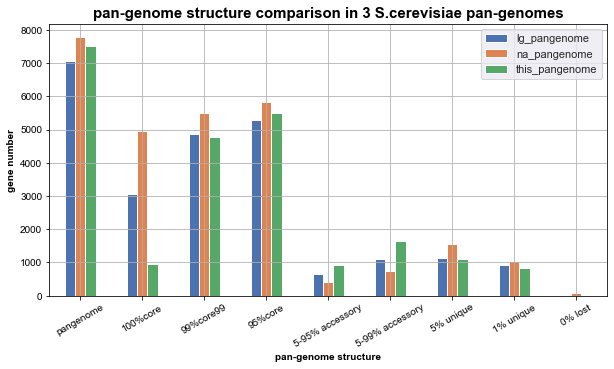

In [6]:
# plot the bar plot for pangenome structure comparison
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.set()
pangenome_structure.plot(kind="bar",ax=ax)
ax.set_ylabel("gene number",weight="bold")
ax.set_xlabel("pan-genome structure",weight="bold")
plt.title("pan-genome structure comparison in 3 S.cerevisiae pan-genomes",weight="bold",fontsize=15)
# rotate the xticklabels
plt.xticks(rotation=30)
plt.show()


In [32]:
# check the core gene number change with the changing of definition of core genes
df_core_gene_number=pd.DataFrame(index=["lg_core","na_core","this_core"],columns=[])
core_list=np.linspace(0.95,0.98,7)
core_list=np.append(core_list,np.linspace(0.982,1,10))
for i in core_list:
    lg_core=len(lg_genes_ratios[lg_genes_ratios>=i])
    na_core=len(na_genes_ratios[na_genes_ratios>=i])
    this_core=len(this_genes_ratios[this_genes_ratios>=i])
    df_core_gene_number[i]=[lg_core,na_core,this_core]
df_core_gene_number

# save result 
df_core_gene_number.to_csv(r"code/3.pan-genome_construction/3.pan-genome_comparison/output/sce_pan_structure_core_gene_number.csv")

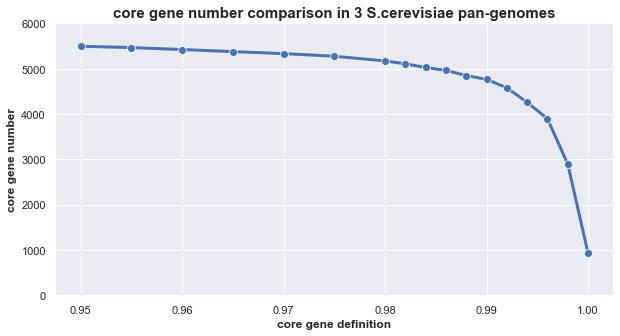

In [31]:
# plot to compare the core gene number change with the changing of definition of core genes
fig,ax=plt.subplots(1,1,figsize=(10,5))
# use ggplot style
sns.set()
sns.lineplot(data=df_core_gene_number.T['this_core'],ax=ax,marker="o",markersize=8,linewidth=3,dashes=False)
ax.set_ylabel("core gene number",weight="bold")
ax.set_xlabel("core gene definition",weight="bold")
plt.title("core gene number comparison in 3 S.cerevisiae pan-genomes",fontsize=15,weight="bold")
plt.ylim(0,5500)
# set the labels of legend
# ax.legend(labels=["lg1364 pan-genome","na1011 pan-genome","this1800 pan-genome"])
# rotate the xticklabels
# plt.xticks(rotation=30)
plt.show()


In [16]:
this_geneMatrix.sum().describe()

count    1807.000000
mean     5982.582180
std        68.776684
min      5608.000000
25%      5957.000000
50%      5993.000000
75%      6022.000000
max      6276.000000
dtype: float64